In [211]:
# Digit recognizer using SVM RBF kernel & PCA pipeline. Training & Test files from Kaggle. - Satish
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [212]:
digits = pd.read_csv("train.csv")
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [213]:
digits.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [214]:
# Creating training and test sets
# Splitting the data into train and test

X = digits.iloc[:, 1:]
Y = digits.iloc[:, 0]

# Rescaling the features
from sklearn.preprocessing import scale
X = scale(X)

# train test split with train_size=25% (reassigned) and test size=20%
# though test.csv is separate file, use it to compare with labels for accuracy score - SR
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.90, random_state=101)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(37800, 784)
(4200, 784)
(37800,)
(4200,)


In [215]:
from sklearn import svm
from sklearn import metrics
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=50, whiten=True, random_state=42)
svc = svm.SVC(kernel='rbf', class_weight='balanced')
svm_pca = make_pipeline(pca, svc)

In [216]:
from sklearn.model_selection import GridSearchCV
# Tuning for C & gamma. Ran multiple times for fine-tuning - SR
#
param_grid = {'svc__C': [10, 15, 17, 20, 25], 'svc__gamma': [0.01, 0.015, 0.016, 0.02]} 
grid = GridSearchCV(svm_pca, param_grid)

%time grid.fit(x_train, y_train)
print(grid.best_params_)

E:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 22min 6s
{'svc__C': 15, 'svc__gamma': 0.015}


In [217]:
svm_pca = grid.best_estimator_
predictions = svm_pca.predict(x_test)
predictions[:10]

array([1, 3, 0, 0, 1, 9, 1, 5, 0, 6], dtype=int64)

In [218]:
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)
confusion

array([[408,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0, 441,   2,   1,   1,   0,   1,   1,   0,   1],
       [  0,   1, 404,   3,   2,   2,   1,   2,   0,   1],
       [  1,   1,   8, 393,   0,   6,   0,   3,   0,   4],
       [  1,   1,   1,   0, 403,   0,   1,   0,   1,   3],
       [  0,   1,   2,   2,   0, 355,   3,   1,   1,   0],
       [  0,   2,   1,   0,   0,   3, 420,   1,   0,   0],
       [  0,   0,   1,   2,   6,   0,   0, 423,   0,   5],
       [  0,   1,   2,   4,   2,   2,   0,   2, 401,   2],
       [  2,   1,   1,   2,   5,   0,   0,   2,   4, 438]], dtype=int64)

In [219]:
# measure accuracy
metrics.accuracy_score(y_true=y_test, y_pred=predictions)

0.9728571428571429

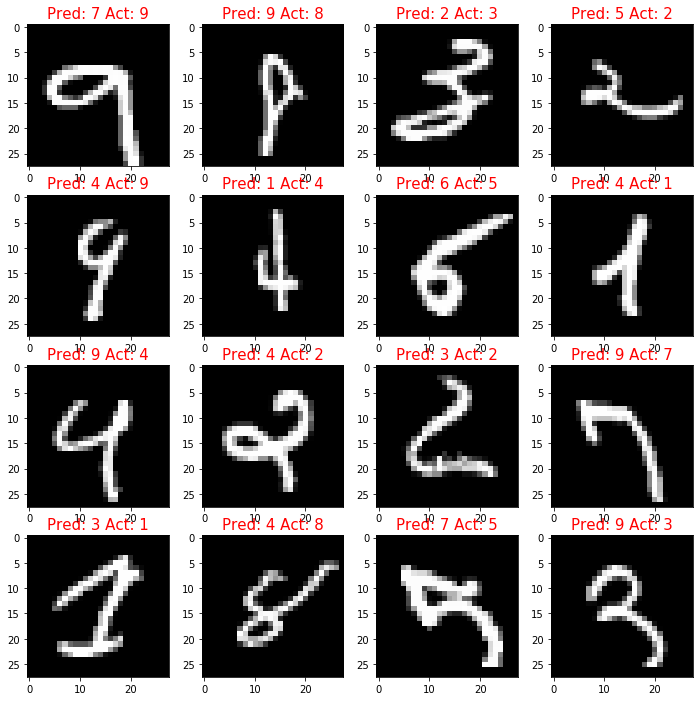

In [220]:
# creating a single dataframe to compare which values did not match so that we can plot & check
pred1 = pd.Series(predictions)
rows = cols = 4
n = rows * cols
frame = {'predicted': pred1.values, 'test': y_test.values, 'y_test_index': y_test.index}
df1 = pd.DataFrame(frame)
df2 = df1.loc[df1['predicted'] != df1['test']]
df2 = df2.sample(n = n, replace = True, random_state=1).reset_index(drop=True)

# Plot few wrongly predicted letters. People need to improve their handwriting !! :-)
#
fig=plt.figure(figsize=(12, 12))
for i in range(1, n+1):
    y_test_ix = df2.iloc[i-1, 2]
    pred_num = df2.iloc[i-1, 0]
    test_num = df2.iloc[i-1, 1]
    ax = fig.add_subplot(4, 4, i)
    num1 = digits.iloc[y_test_ix, 1:]
    num1 = num1.values.reshape(28, 28)
    ax.set_title("Pred: " + str(pred_num) + " Act: " + str(test_num), fontsize="15", color="red")
    plt.imshow(num1, cmap='gray')
    
plt.show()

In [221]:
digits_test = pd.read_csv("test.csv")
X = digits_test.iloc[:, 0:]
x_test = scale(X)
predictions = svm_pca.predict(x_test)
predictions[:n]

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 3, 0, 4, 5], dtype=int64)

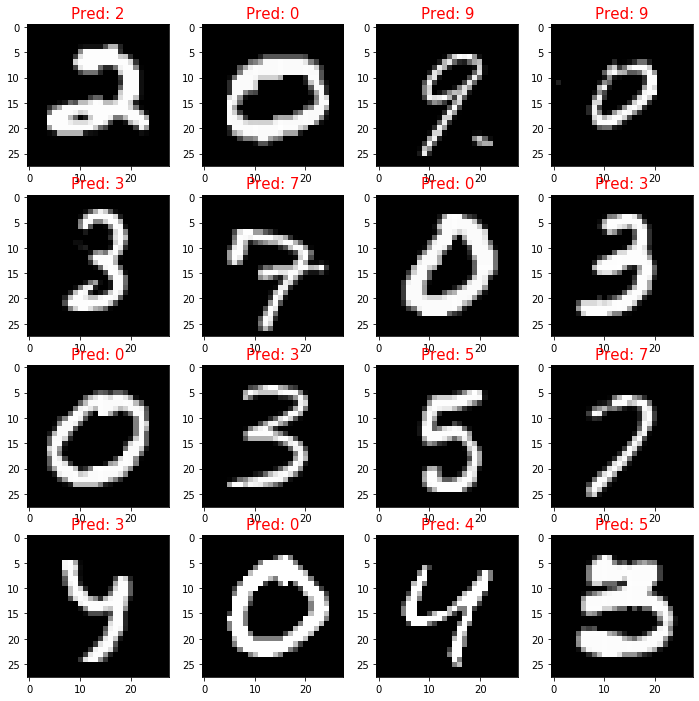

In [222]:
# Plot 
fig=plt.figure(figsize=(12, 12))
for i in range(1, n+1):
    ax = fig.add_subplot(4, 4, i)
    num1 = X.iloc[i-1, 0:]
    num1 = num1.values.reshape(28, 28)
    
    ax.set_title("Pred: " + str(predictions[i-1]), fontsize="15", color="red")
    plt.imshow(num1, cmap='gray')
plt.show()

In [223]:
# Write to submission.csv
d = {'ImageID': [i for i in range(predictions.size)], 'label': list(predictions) }
df4 = pd.DataFrame(d)
df4['ImageID'] = df4['ImageID'] + 1
# print (df4.head())
df4.set_index('ImageID', inplace=True) 
print (df4.head())
df4.to_csv('submission.csv')

         label
ImageID       
1            2
2            0
3            9
4            9
5            3
